# Contexto

---
Predecir si un cliente cancelará o no la reserva realizada

La base de datos cuenta con 12 atributos regresores más la etiqueta de clase, que son:

* **hotel**: : Hotel (H1 = Resort Hotel o H2 = City Hotel)
* **is_canceled**: Valor que indica si la reserva se canceló (1) o no (0).

* **lead_time**: Número de días transcurridos entre la fecha de entrada de la reserva en el
PMS y la fecha de llegada

* **arrival_date_year**: Año de la fecha de llegada
* **arrival_date_month**: Mes de la fecha de llegada
* **arrival_date_week_number**: Número de semana del año de la fecha de llegada
* **arrival_date_day_of_month**: Día de la fecha de llegada
* **stays_in_weekend_nights**: Número de noches de fin de semana (sábado o domingo)
* **stays_in_week_nights**: Número de noches entre semana (de lunes a viernes) que el
cliente se alojó o reservó en el hotel.

* **adults**: Número de adultos
* **children**: Número de niños
* **babies**: Número de bebes
* **meal**: Tipo de comida reservada. Las categorías se presentan en paquetes de comidas de hospitalidad estándar: Undefined/SC - sin paquete de comidas; BB - Alojamiento y desayuno; HB - Media pensión (desayuno y otra comida - normalmente cena); FB - Pensión completa (desayuno, almuerzo y cena)

* **country**:  País de origen.
* **market_segment**: Designación del segmento de mercado. En las categorías, el término TA significa agencias de viaje y TO operadores turísticos.


* **distribution_channel**:  Canal de distribución de reservas. En las categorías, el término
TA significa agencias de viaje y TO operadores turísticos.

* **is_repeated_guest**: : Valor que indica si el nombre de la reserva era de un huésped repetido (1) o no (0)
* **previous_cancellations**: Número de reservas anteriores canceladas por el cliente antes de la reserva actual
* **previous_bookings_not_canceled**: Número de reservas anteriores no canceladas por el cliente antes de la reserva actual
* **reserved_room_type**: : Código del tipo de habitación reservada. El código se presenta en lugar de la designación por razones de anonimato.
* **assigned_room_type**: Código del tipo de habitación asignado a la reserva
* **booking_changes**: Número de cambios/enmiendas realizados en la reserva desde el
momento en que se introdujo en el PMS
* **deposit_type**: : Indicación de si el cliente hizo un depósito para garantizar la reserva.
Esta variable puede asumir tres categorías: No Deposit: no se realizó ningún depósito; No Refund: se realizó un depósito por valor del coste total de la estancia; Refundable: se realizó un depósito por valor inferior al coste total de la estancia.

* **agent**: ID de la agencia de viajes que realizó la reserva
* **company**: : ID de la empresa/entidad que realizó la reserva o responsable del pago de la reserva. La identificación se presenta en lugar de la designación por razones de anonimato.

* **days_in_waiting_list**: Número de días que la reserva estuvo en lista de espera antes
de ser confirmada al cliente

* **customer_type**: Tipo de reserva, asumiendo una de las cuatro categorías: Contract - cuando la reserva tiene asociada una adjudicación u otro tipo de contrato; Group -
cuando la reserva está asociada a un grupo; Transient - cuando la reserva no forma parte de un grupo o contrato, y no está asociada a otra reserva transitoria;
Transient-party - cuando la reserva es transitoria, pero está asociada al menos a otra reserva transitoria
* **adr**: Tarifa media diaria definida dividiendo la suma de todas las transacciones de
alojamiento por el número total de noches de estancia.

* **required_car_parking_spaces**: Número de plazas de aparcamiento que necesita el cliente
* **total_of_special_requests**: Número de peticiones especiales realizadas por el cliente (por ejemplo, cama doble o piso alto)

* **reservation_status**: Último estado de la reserva, asumiendo una de las tres categorías: Canceled: el cliente ha cancelado la reserva; Check-Out: el cliente se ha
registrado pero ya se ha marchado; No-Show: el cliente no se ha registrado y ha informado al hotel del motivo
* **reservation_status_date**: Fecha en la que se estableció el último estado. Esta variable se puede utilizar junto con ReservationStatus para saber cuándo se cancela la reserva o cuándo abandona el cliente el hotel.



# Punto 1

---

Importa las librerías necesarias:
* preprocesamiento de datos, visualización
* creación de un modelo de red neuronal feedforward con Keras y Tensorflow,
* regularización y búsqueda de grilla.

In [71]:
#!pip install tensorflow
#!pip install scikeras

In [72]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import GridSearchCV

In [73]:
from keras.optimizers import SGD, Adagrad, Adadelta, Adam
from keras.models import Sequential
from keras.initializers import HeNormal, GlorotNormal, glorot_uniform
from keras.regularizers import l1, l2, l1_l2
from keras.constraints import MaxNorm
from keras.layers import Dropout,Dense

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from scikeras.wrappers import KerasClassifier

Cargamos los datos

In [74]:
data = pd.read_csv('hotel_bookings.csv')
data.head()

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
1,1,Resort Hotel,0,737,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-15
2,2,Resort Hotel,0,7,2015,July,27,1,0,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
3,3,Resort Hotel,0,13,2015,July,27,1,0,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-15
4,4,Resort Hotel,0,14,2015,July,27,1,0,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-15


Descartar las columnas `index`, `arrival_date_year`, `agent`, `country`, `company`, `reservation_status` y `reservation_status_date`.

In [75]:
print('Todas las columnas')
print(data.columns)
columnas_drop = ['index', 'arrival_date_year', 'agent', 'country', 'company', 'reservation_status', 'reservation_status_date']
data = data.drop( columns=columnas_drop, axis=0)

print('Dataframe Actualizado')
print(data.columns)


Todas las columnas
Index(['index', 'hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')
Dataframe Actualizado
Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal

Análisis de calidad.
* If ausentes <4% then eliminar registros
* If ausentes >4% then imputar OR drop column


In [76]:
def data_quality_analysis(df):
    # Crear un nuevo dataframe para almacenar los resultados
    result_df = pd.DataFrame(columns=['Column', 'Type', 'Unique', 'Missing'])

    columns = df.columns
    data_types = df.dtypes.to_list()
    unique_values = [df[column].nunique() for column in columns]
    missing_values = [df[column].isnull().sum() for column in columns]

    result_df['Column'] = columns
    result_df['Type'] = data_types
    result_df['Unique'] = unique_values
    result_df['Missing'] = missing_values

    return result_df

In [77]:
print('Registros: ',data.shape[0])
print('Columnas: ', data.shape[1])
print('Análisis de calidad')
data_quality_analysis(data)

Registros:  119390
Columnas:  26
Análisis de calidad


,Column,Type,Unique,Missing
0,hotel,object,2,0
1,is_canceled,int64,2,0
2,lead_time,int64,479,0
3,arrival_date_month,object,12,0
4,arrival_date_week_number,int64,53,0
5,arrival_date_day_of_month,int64,31,0
6,stays_in_weekend_nights,int64,17,0
7,stays_in_week_nights,int64,35,0
8,adults,int64,14,0
9,children,float64,5,4


In [78]:
data = data.dropna(subset=['children'])

## Punto 2

---



Revisar outlier para la variable `adr`.
Indicar la cantidad de outliers por arriba y por abajo. 
Eliminar sólo los tres valores más extremos en ambos
casos, para los demás cambia sus valores por el valor promedio de la variable.


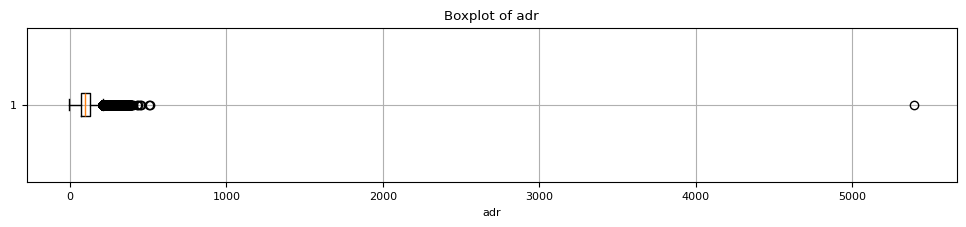

Valores considerados outliers: < -16 o > 211
Outliers inferiores <-16: 0
Outliers inferiores >211: 3793
Total outliers: 3793


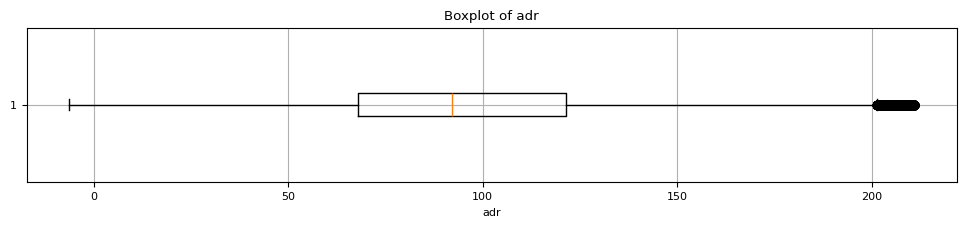

In [79]:
columna = 'adr'  # Cambia esto por el nombre de la columna que quieras analizar

# 1. Visualizar outliers con boxplot
plt.figure(figsize=(12, 2))
plt.boxplot(data[columna], vert=False)
plt.title(f'Boxplot of {columna}')
plt.xlabel(columna)
plt.grid(True)
plt.show()

Q1 = data[columna].quantile(0.25)
Q3 = data[columna].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Valores considerados outliers: < {lower_bound:.0f} o > {upper_bound:.0f}")
print(f"Outliers inferiores <{lower_bound:.0f}: {len(data[(data[columna] < lower_bound)])}")
print(f"Outliers inferiores >{upper_bound:.0f}: {len(data[(data[columna] > upper_bound)])}")
print(f"Total outliers: {len(data[(data[columna] < lower_bound) | (data[columna] > upper_bound)])}")

# 3. Eliminar outliers
data = data[(data[columna] >= lower_bound) & (data[columna] <= upper_bound)]

plt.figure(figsize=(12, 2))
plt.boxplot(data[columna], vert=False)
plt.title(f'Boxplot of {columna}')
plt.xlabel(columna)
plt.grid(True)
plt.show()


Construye un histograma para la variable adr con reservas canceladas y no canceladas, y comenta el resultado

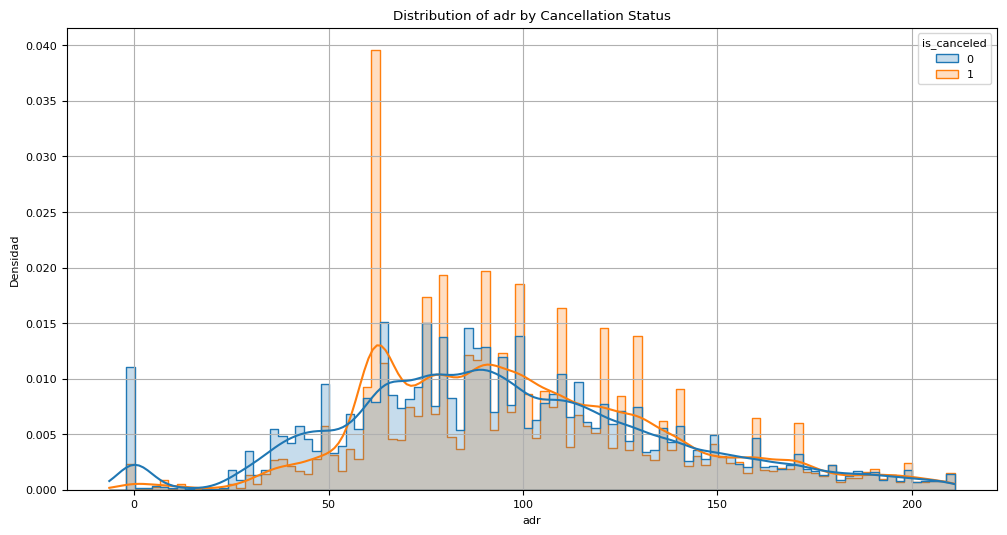

In [80]:
plt.rcParams.update({'font.size': 8})
plt.figure(figsize=(12, 6))
sns.histplot(
    data=data,
    x='adr',
    hue='is_canceled',
    kde=True,
    stat="density",
    common_norm=False,
    element="step",
    palette="tab10",
)

plt.title('Distribution of adr by Cancellation Status')
plt.xlabel('adr')
plt.ylabel('Densidad')
plt.grid(True)
plt.show()


Se puede evidenciar que el atributo adr no es determinante para clasificar si un registro se encuentra cancelado o no.

Transforma las variables categóricas en variables dummies.

In [81]:
manual_map = {
    'Undefined': 0,'SC': 0,
    'BB': 1,
    'HB': 2,
    'BB': 3,
    'FB': 4
    }
month_map = {
    'January': 1, 'February': 2, 'March': 3,
    'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9,
    'October': 10, 'November': 11, 'December': 12
}


data['arrival_month_num'] = data['arrival_date_month'].map(month_map)
data['meal_encoded'] = data['meal'].map(manual_map)
data['hotel_encoded'] = data['hotel'].map({'Resort Hotel': 0, 'City Hotel': 1})

data = pd.get_dummies(data, columns=['market_segment'], prefix='segment')
data = pd.get_dummies(data, columns=['distribution_channel'], prefix='channel')
data = pd.get_dummies(data, columns=['reserved_room_type'], prefix='room')
data = pd.get_dummies(data, columns=['deposit_type'], prefix='deposit')
data = pd.get_dummies(data, columns=['customer_type'], prefix='customer')

data = data.drop(columns=['arrival_date_month', 'meal', 'hotel','assigned_room_type'])
data = data.astype({col: 'int' for col in data.select_dtypes(include='bool').columns})

data_quality_analysis(data)

,Column,Type,Unique,Missing
0,is_canceled,int64,2,0
1,lead_time,int64,479,0
2,arrival_date_week_number,int64,53,0
3,arrival_date_day_of_month,int64,31,0
4,stays_in_weekend_nights,int64,17,0
5,stays_in_week_nights,int64,35,0
6,adults,int64,14,0
7,children,float64,5,0
8,babies,int64,5,0
9,is_repeated_guest,int64,2,0


Estandarizar las variables independientes con media igual a cero y desviación estándar 1


In [82]:
cols_binarias = [col for col in data.columns if data[col].dropna().isin([0,1]).all()]
cols_numericas = [col for col in data.select_dtypes(include=['int64', 'float64']).columns if col not in cols_binarias]

print('Columnas para Escalar [0,1]:')
print(cols_numericas)

print('Columnas Binarias:')
print(cols_binarias)


scaler = MinMaxScaler()
data[cols_numericas] = scaler.fit_transform(data[cols_numericas])
print('✅Data escalada [0,1]')

Columnas para Escalar [0,1]:
['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'arrival_month_num', 'meal_encoded']
Columnas Binarias:
['is_canceled', 'is_repeated_guest', 'hotel_encoded', 'segment_Aviation', 'segment_Complementary', 'segment_Corporate', 'segment_Direct', 'segment_Groups', 'segment_Offline TA/TO', 'segment_Online TA', 'channel_Corporate', 'channel_Direct', 'channel_GDS', 'channel_TA/TO', 'channel_Undefined', 'room_A', 'room_B', 'room_C', 'room_D', 'room_E', 'room_F', 'room_G', 'room_H', 'room_L', 'room_P', 'deposit_No Deposit', 'deposit_Non Refund', 'deposit_Refundable', 'customer_Contract', 'customer_Group', 'customer_Transient', 'customer_Transient-Party']
✅Data escalada [0,1]


Selecciona 5 variables que consideres relevantes (que no sean la variable
adr) con respecto a cancelar una reserva.

<Axes: >

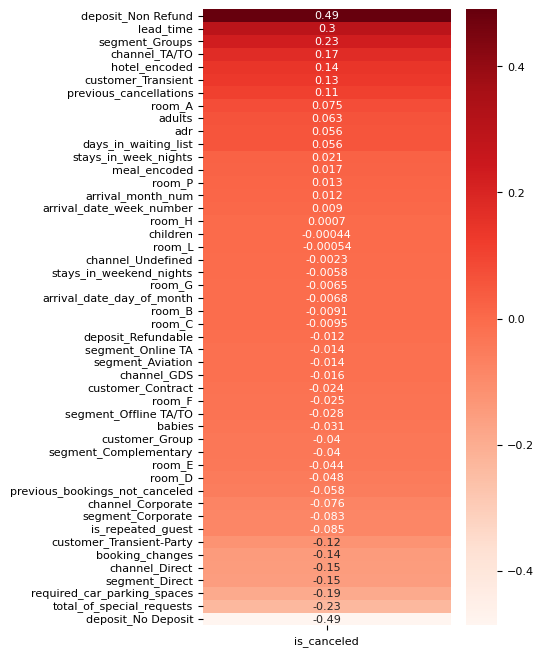

In [83]:
plt.rcParams.update({'font.size': 8})
plt.figure(figsize=(4, 8))

sns.heatmap(data.loc[:, data.columns].corr().loc[:, ['is_canceled']]
            .sort_values('is_canceled', ascending=False)
            .iloc[1:], cmap='Reds', annot=True)

realiza una división de los datos para entrenamiento y test, este último con un
33% de registros

In [84]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('is_canceled', axis=1),
    data['is_canceled'],
    test_size=0.33,
    random_state=42
    )

# Punto 3

---

Implementar red neuronal multicapa, considerando las siguientes características:
* 3 capas ocultas
* Funciones activacion (capa oculta): tanh,relu
* Mínimo 20 neuronas en cada capa oculta
* Optimizador SGD
* 10 epochs
* cada capa 1 nuerona de sesgo
* inicializador de pesos y sesgos




Implementar red neuronal multicapa, considerando las siguientes características:

* mismas caráterísticas modelo anterior
* Funciones activacion (capa oculta): tanh


In [85]:
# Configuración común
input_dim = X_train.shape[1]
epochs = 10
batch_size = 32
init_weights = 'glorot_uniform'  # o puedes usar 'he_uniform'

model1 = Sequential()
model1.add(keras.Input(shape=(X_train.shape[1], )))
model1.add(
        Dense(
            units=32,
            use_bias=True,
            activation='tanh',
            kernel_initializer=HeNormal(seed=24),
            bias_initializer='zeros'
        ))
model1.add(
        Dense(
            units=32,
            use_bias=True,
            activation='relu',
            kernel_initializer=HeNormal(seed=24),
            bias_initializer='zeros'
        ))
model1.add(
        Dense(
            units=32,
            use_bias=True,
            activation='tanh',
            kernel_initializer=HeNormal(seed=24),
            bias_initializer='zeros'
        ))
model1.add(
        Dense(
            units=1,
            use_bias=True,
            activation='sigmoid',
            kernel_initializer=HeNormal(seed=24),
            bias_initializer='zeros'
        ))

model1.compile(optimizer=SGD(learning_rate=0.03), loss='binary_crossentropy', metrics=['accuracy'])

history1 = model1.fit(X_train, y_train, validation_split=.33,epochs=epochs, batch_size=batch_size, verbose=0)


In [86]:
model2 = Sequential()
model2.add(keras.Input(shape=(X_train.shape[1], )))
model2.add(
        Dense(
            units=32,
            use_bias=True,
            activation='tanh',
            kernel_initializer=HeNormal(seed=24),
            bias_initializer='zeros'
        ))
model2.add(
        Dense(
            units=32,
            use_bias=True,
            activation='tanh',
            kernel_initializer=HeNormal(seed=24),
            bias_initializer='zeros'
        ))
model2.add(
        Dense(
            units=32,
            use_bias=True,
            activation='tanh',
            kernel_initializer=HeNormal(seed=24),
            bias_initializer='zeros'
        ))
model2.add(
        Dense(
            units=1,
            use_bias=True,
            activation='sigmoid',
            kernel_initializer=HeNormal(seed=24),
            bias_initializer='zeros'
        ))

model2.compile(optimizer=SGD(learning_rate=0.03), loss='binary_crossentropy', metrics=['accuracy'])

history2 = model2.fit(X_train, y_train, validation_split=.33, epochs=epochs, batch_size=batch_size, verbose=0)

In [87]:
# ====== Evaluar ambos modelos ======
acc1 = model1.evaluate(X_test, y_test, verbose=0)[1]
acc2 = model2.evaluate(X_test, y_test, verbose=0)[1]

print(f"Accuracy modelo 1 (tanh-relu-tanh): {acc1:.3f}")
print(f"Accuracy modelo 2 (tanh-tanh-tanh): {acc2:.3f}")


Accuracy modelo 1 (tanh-relu-tanh): 0.792
Accuracy modelo 2 (tanh-tanh-tanh): 0.802


In [88]:
def viz_loss(history):
    epochs_ = len(history['accuracy'])
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    ax[0].plot(history['accuracy'])
    ax[0].plot(history['val_accuracy'])
    ax[0].set_xticks(np.arange(epochs_), np.arange(1, epochs_+1))
    ax[0].set_title('model accuracy')
    ax[0].set_ylabel('accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].legend(['train', 'test'], loc='lower right')


    # summarize history for loss
    ax[1].plot(history['loss'])
    ax[1].plot(history['val_loss'])
    ax[1].set_xticks(np.arange(epochs_), np.arange(1, epochs_+1))
    ax[1].set_title('model loss')
    ax[1].set_ylabel('loss')
    ax[1].set_xlabel('epoch')
    ax[1].legend(['train', 'test'], loc='upper center')

    plt.tight_layout()
    plt.show()


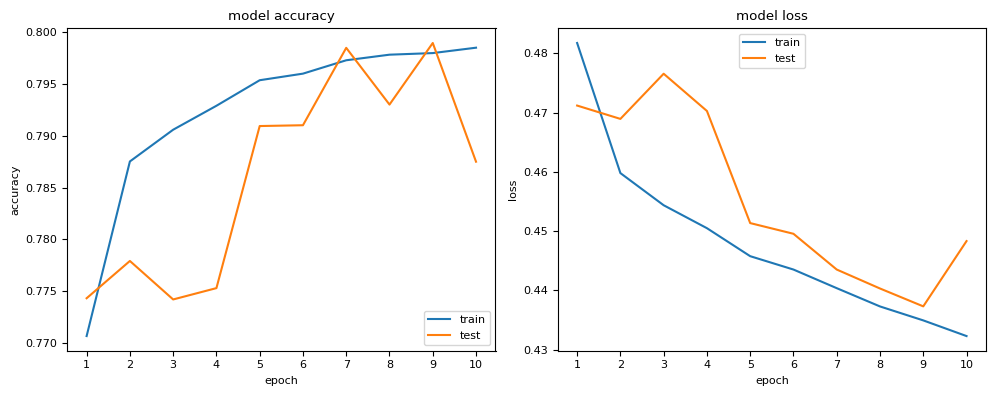

In [89]:
viz_loss(history1.history)

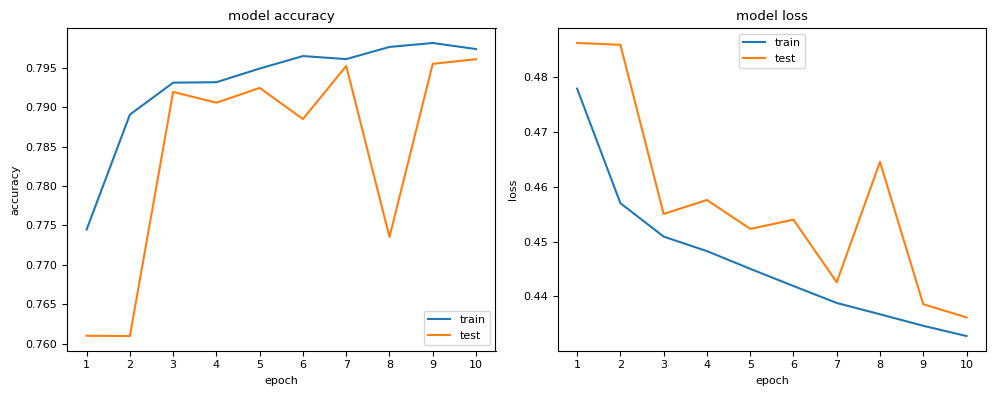

In [90]:
viz_loss(history2.history)

# Punto 4

---
Construye una red neuronal con regularización Dropout aplicando búsqueda de grilla para tres fold


1. Cantidad de capas ocultas: de 3 o 4
2. Método de optimización: Adam o SGD
3. Learning_rate: 0.03 y 0.06
4. Cantidad de neuronas en las capas ocultas: 20
5. Funciones de activación en las capas ocultas: tanh
6. Rate para Dropout: 0.001
7. Inicialización de los pesos: `glorot_normal`, ` glorot_uniform`





In [91]:
param_grid = {
    'model__n_layers': [3, 4],
    'model__optimizer': ['adam', 'sgd'],
    'model__learning_rate': [0.03, 0.06],
    'model__init': ['glorot_normal', 'glorot_uniform']
}

In [95]:
def build_model(n_layers=3, optimizer='adam', learning_rate=0.03, init='glorot_uniform', dropout_rate=0.001):
    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    else:
        opt = SGD(learning_rate=learning_rate)

    model = Sequential()
    model.add(keras.Input(shape=(X_train.shape[1], )))
    for _ in range(n_layers - 1):
        model.add(Dense(20, activation='tanh', kernel_initializer=init))
        model.add(Dropout(dropout_rate))

    model.add(Dense(1, activation='sigmoid'))  # Binary classification

    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [96]:
model3 = KerasClassifier(
    model=build_model,
    epochs=10,
    batch_size=128,
    verbose=0
)

In [97]:
grid = GridSearchCV(estimator=model3, param_grid=param_grid, cv=3, scoring='accuracy', verbose=0)
grid_result = grid.fit(X_train, y_train)

# Evaluar el mejor modelo
best_model = grid_result.best_estimator_
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

Mostrar los hiper parámetros óptimos encontrados por la búsqueda de grilla

In [98]:
print('Mejores Hiperparámetros:')
grid_result.best_params_

Mejores Hiperparámetros:


{'model__init': 'glorot_uniform',
 'model__learning_rate': 0.03,
 'model__n_layers': 3,
 'model__optimizer': 'adam'}

Muestra la curva ROC para el mejor modelo incluyendo el AUC.

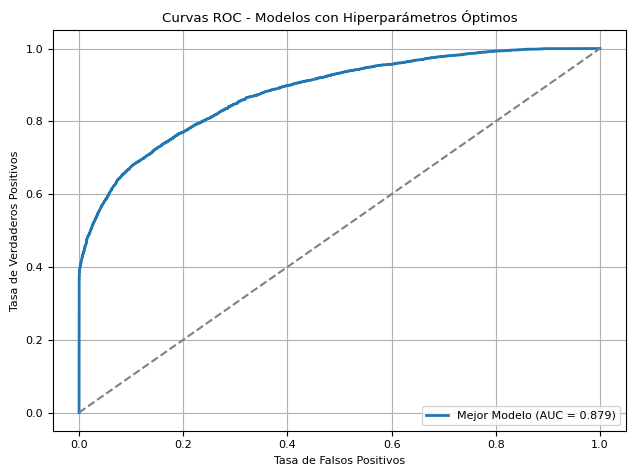

{'0': {'precision': 0.8103417103597903,
  'recall': 0.9303773819902852,
  'f1-score': 0.8662208650612655,
  'support': 24087.0},
 '1': {'precision': 0.8401486988847584,
  'recall': 0.6269293690874174,
  'f1-score': 0.7180448065173116,
  'support': 14059.0},
 'accuracy': 0.8185392963875636,
 'macro avg': {'precision': 0.8252452046222744,
  'recall': 0.7786533755388513,
  'f1-score': 0.7921328357892885,
  'support': 38146.0},
 'weighted avg': {'precision': 0.8213273039127847,
  'recall': 0.8185392963875636,
  'f1-score': 0.8116094455921351,
  'support': 38146.0}}

In [99]:
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, lw=2, label=f'Mejor Modelo (AUC = {roc_auc:.3f})')
plt.title('Curvas ROC - Modelos con Hiperparámetros Óptimos')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

report

# Punto 5

---



Del conjunto original (sin los valores excluidos) escoge al azar cinco observaciones en que “deposit_type_Non Refund” sea cero, y con esto realiza una predicción usando el mejor modelo encontrado por la búsqueda de grilla anterior. Comenta los resultados.


In [100]:
data.columns

Index(['is_canceled', 'lead_time', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'arrival_month_num', 'meal_encoded',
       'hotel_encoded', 'segment_Aviation', 'segment_Complementary',
       'segment_Corporate', 'segment_Direct', 'segment_Groups',
       'segment_Offline TA/TO', 'segment_Online TA', 'channel_Corporate',
       'channel_Direct', 'channel_GDS', 'channel_TA/TO', 'channel_Undefined',
       'room_A', 'room_B', 'room_C', 'room_D', 'room_E', 'room_F', 'room_G',
       'room_H', 'room_L', 'room_P', 'deposit_No Deposit',
       'deposit_Non Refund', 'deposit_Refundable', 'customer_Contract',
       'customer_Group', 'customer_Transient', 'customer_Trans

In [111]:
samples_5 = data[data['deposit_Non Refund']==0]
samples_5 = samples_5.sample(n=5)
samples_5 

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,room_H,room_L,room_P,deposit_No Deposit,deposit_Non Refund,deposit_Refundable,customer_Contract,customer_Group,customer_Transient,customer_Transient-Party
79037,0,0.001357,0.807692,0.633333,0.000000,0.02,0.018182,0.0,0.0,0,...,0,0,0,1,0,0,1,0,0,0
96247,0,0.005427,0.673077,0.933333,0.052632,0.02,0.018182,0.0,0.0,0,...,0,0,0,1,0,0,0,0,1,0
9072,1,0.073270,0.826923,0.833333,0.105263,0.12,0.036364,0.0,0.0,0,...,0,0,0,1,0,0,0,0,1,0
56379,1,0.084125,0.692308,0.100000,0.105263,0.04,0.036364,0.0,0.0,0,...,0,0,0,1,0,0,0,0,1,0
7768,1,0.108548,0.653846,0.833333,0.000000,0.02,0.036364,0.0,0.0,0,...,0,0,0,1,0,0,0,0,1,0


In [112]:
samples_5_X = samples_5.drop(columns=['is_canceled'])
samples_5_y = samples_5['is_canceled']
samples_5_y

79037    0
96247    0
9072     1
56379    1
7768     1
Name: is_canceled, dtype: int64

In [113]:
y_pred_5 = best_model.predict(samples_5_X)

y_prob_5 = best_model.predict_proba(samples_5_X)[:, 1]

resultados = pd.DataFrame({
    'Real': samples_5_y.values,
    'Predicción': y_pred_5,
    'Probabilidad': y_prob_5
})

resultados

,Real,Predicción,Probabilidad
0,0,0,0.067807
1,0,0,0.056479
2,1,1,0.588283
3,1,0,0.311317
4,1,1,0.749427


✅ Predicciones correctas: Las observaciones 0, 1, 2 y 4 fueron clasificadas correctamente. Es decir, el modelo acertó en 4 de 5 casos.

⚠️ Error del modelo: La observación 3 fue mal clasificada. Aunque el valor real es 1 (cancelada), el modelo predijo 0 (no cancelada). Sin embargo, la probabilidad asociada fue de 31%, lo que indica incertidumbre razonable.

📈 Confianza del modelo:

Para los casos negativos (no cancelación), el modelo mostró alta confianza (probabilidades < 0.07).

Para los casos positivos (cancelación), las probabilidades fueron más variadas, pero razonablemente altas en las predicciones correctas (0.588 y 0.749). 